# How to Improve a Machine Learning Model

There are three general approaches for improving an existing machine learning model:
1. Use more (high-quality) data and feature engineering
2. Tune the hyperparameters of the algorithm
3. Try different algorithms


# Our task is to predict the temperature of tomorrow using historical data

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor

raw_data = pd.read_csv('temps.csv')

# These are not features. These are predicted outcomes
raw_data.drop(['forecast_noaa','forecast_acc','forecast_under'],axis=1,inplace=True)

raw_data = pd.concat([raw_data,pd.get_dummies(raw_data.week,prefix='week')],axis=1)

raw_data.drop('week',axis=1,inplace=True)

raw_label = raw_data.actual
del raw_data['actual']

X_train,X_test,y_train,y_test = train_test_split(raw_data,
                                                 raw_label,
                                                 test_size=0.25,
                                                 random_state=42)

# The baseline predictions are the historical averages
print('Average baseline error: ',round(np.mean(abs(X_test['average'] - y_test)),2)) # in degrees

model = RandomForestRegressor(n_estimators=1000 , random_state = 42)
model.fit(X_train,y_train)

# Use the forest's predict method on the test data
predict = model.predict(X_test)

# Calculate the absolute errors
errors = abs(predict - y_test)

# Print out the mean absolute error (mae)
print('Average model error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Improvement over baseline:', round(accuracy, 2), '%.')

Average baseline error:  5.06
Average model error: 3.83
Improvement over baseline: 93.98 %.


# collecting more data to improve this accuracy

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [102]:
raw_data = pd.read_csv('temps_extended.csv')

In [103]:
raw_data.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [104]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 12 columns):
year       2191 non-null int64
month      2191 non-null int64
day        2191 non-null int64
weekday    2191 non-null object
ws_1       2191 non-null float64
prcp_1     2191 non-null float64
snwd_1     2191 non-null int64
temp_2     2191 non-null int64
temp_1     2191 non-null int64
average    2191 non-null float64
actual     2191 non-null int64
friend     2191 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 205.5+ KB


In [105]:
raw_data = pd.concat([raw_data,pd.get_dummies(raw_data['weekday'],prefix='week')],axis=1)
raw_data.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40,0,0,1,0,0,0,0
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50,0,0,0,1,0,0,0
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42,0,1,0,0,0,0,0
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59,0,0,0,0,0,1,0
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39,0,0,0,0,0,0,1


In [106]:
raw_labels = raw_data.actual

In [107]:
raw_data.drop(['weekday','actual'],inplace=True,axis=1)

In [108]:
raw_data.head()

,year,month,day,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2011,1,1,4.92,0.00,0,36,37,45.6,40,0,0,1,0,0,0,0
1,2011,1,2,5.37,0.00,0,37,40,45.7,50,0,0,0,1,0,0,0
2,2011,1,3,6.26,0.00,0,40,39,45.8,42,0,1,0,0,0,0,0
3,2011,1,4,5.59,0.00,0,39,42,45.9,59,0,0,0,0,0,1,0
4,2011,1,5,3.80,0.03,0,42,38,46.0,39,0,0,0,0,0,0,1


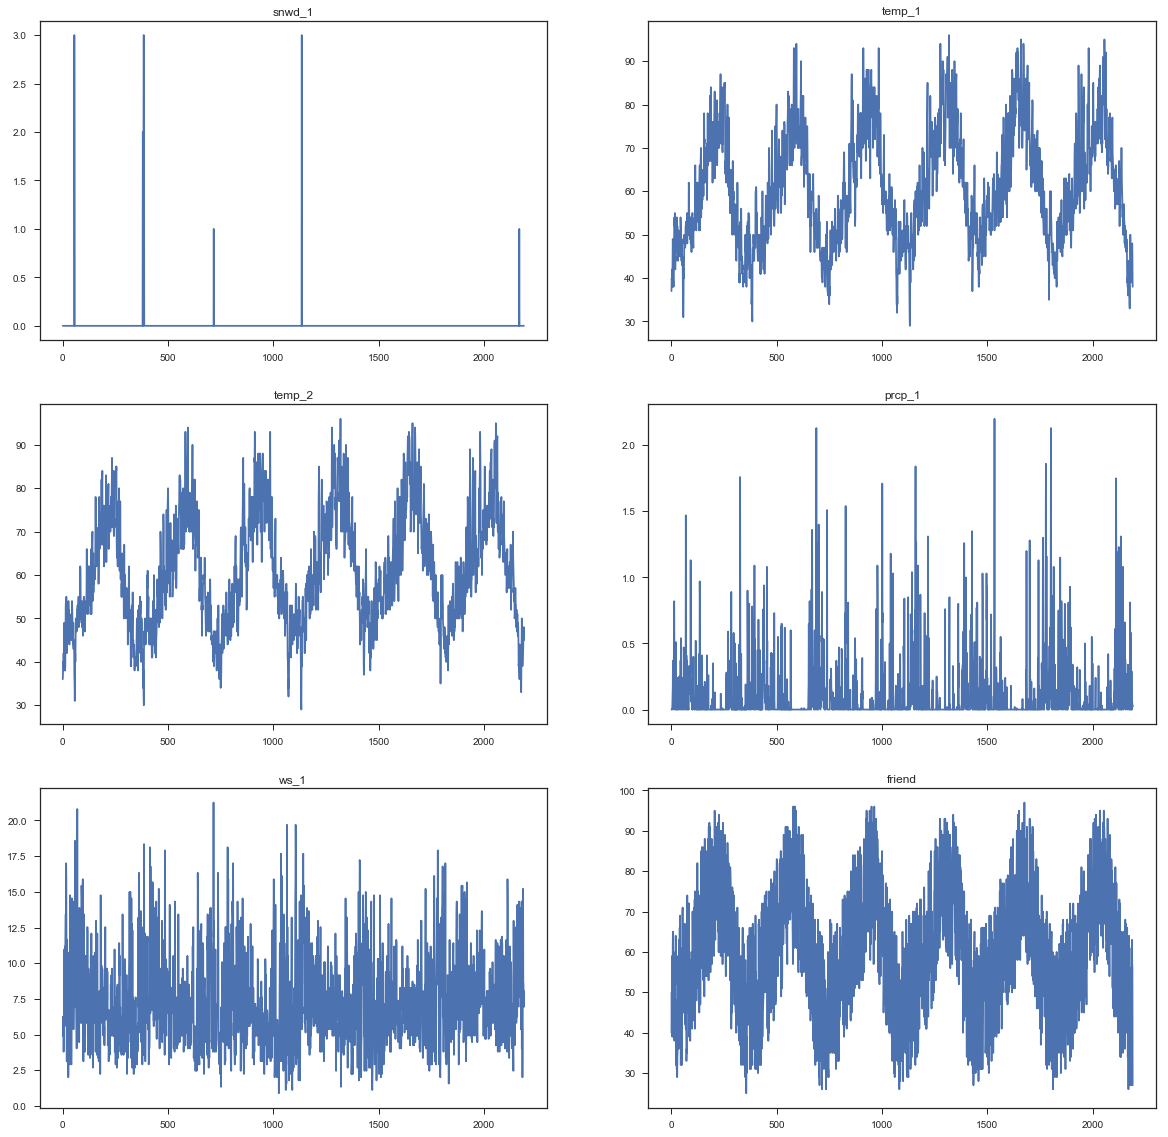

In [109]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.plot(raw_data.snwd_1)
plt.title('snwd_1')

plt.subplot(3,2,2)
plt.plot(raw_data.temp_1)
plt.title('temp_1')

plt.subplot(3,2,3)
plt.plot(raw_data.temp_2)
plt.title('temp_2')

plt.subplot(3,2,4)
plt.plot(raw_data.prcp_1)
plt.title('prcp_1')

plt.subplot(3,2,5)
plt.plot(raw_data.ws_1)
plt.title('ws_1')

plt.subplot(3,2,6)
plt.plot(raw_data.friend)
plt.title('friend')
plt.show()

# snwd_1 contains some outliers. Further it is useless because most of the values is zero

In [110]:
raw_data.snwd_1.value_counts()

0    2180
3       4
1       4
2       3
Name: snwd_1, dtype: int64

In [111]:
raw_data[raw_data.snwd_1!=0]

,year,month,day,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
55,2011,2,25,9.84,0.00,3,37,35,50.9,57,1,0,0,0,0,0,0
56,2011,2,26,10.29,0.00,1,35,31,51.1,45,0,0,1,0,0,0,0
380,2012,1,16,7.16,0.21,2,40,34,47.3,66,0,1,0,0,0,0,0
381,2012,1,17,11.18,0.10,2,34,35,47.4,44,0,0,0,0,0,1,0
383,2012,1,19,11.18,0.78,1,38,32,47.6,34,0,0,0,0,1,0,0
384,2012,1,20,3.58,0.60,3,32,30,47.7,32,1,0,0,0,0,0,0
385,2012,1,21,5.14,0.53,3,30,45,47.8,63,0,0,1,0,0,0,0
386,2012,1,22,18.34,0.12,2,45,47,47.9,67,0,0,0,1,0,0,0
717,2012,12,19,11.86,0.13,1,47,39,45.1,33,0,0,0,0,0,0,1
1135,2014,2,10,5.37,0.02,3,42,39,49.4,31,0,1,0,0,0,0,0


In [112]:
raw_data.columns.tolist()

['year',
 'month',
 'day',
 'ws_1',
 'prcp_1',
 'snwd_1',
 'temp_2',
 'temp_1',
 'average',
 'friend',
 'week_Fri',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

In [113]:
# Create columns of seasons for pair plotting colors
seasons = []
for month in raw_data['month']:
    if month in [1, 2, 12]:
        seasons.append('winter')
    elif month in [3, 4, 5]:
        seasons.append('spring')
    elif month in [6, 7, 8]:
        seasons.append('summer')
    elif month in [9, 10, 11]:
        seasons.append('fall')
# Will only use six variables for plotting pairs
reduced_features = raw_data[['temp_1', 'prcp_1', 'ws_1', 'average', 'friend']]
reduced_features['season'] = seasons
reduced_features['actual'] = raw_labels
# Use seaborn for pair plots

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\GirrajJangid\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


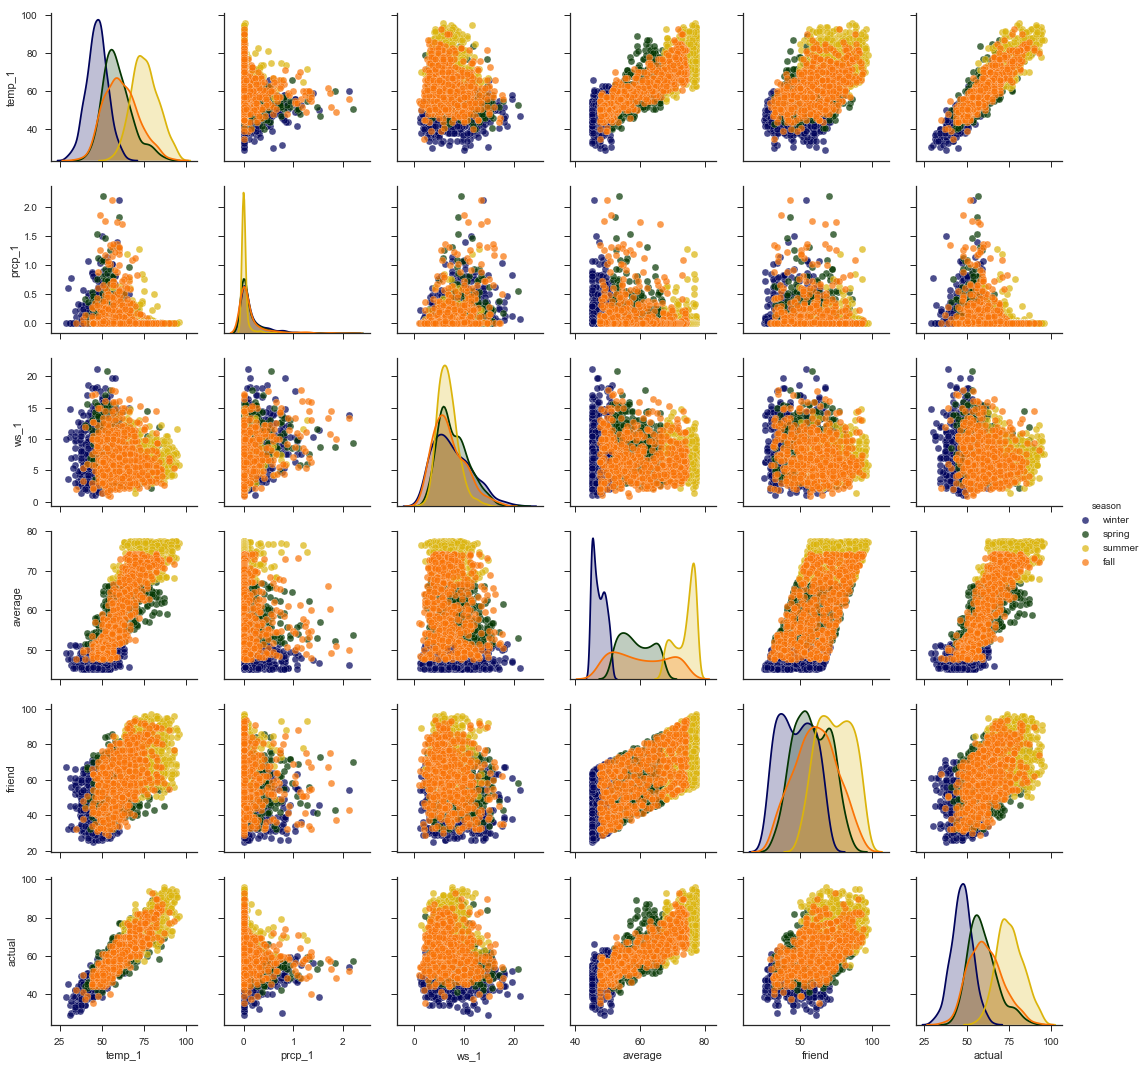

In [114]:
sns.set(style="ticks", color_codes=True)

# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features, 
             hue = 'season', 
             diag_kind = 'kde', 
             palette= palette, 
             plot_kws=dict(alpha = 0.7),
             diag_kws=dict(shade=True))

In [115]:
X_train, X_test, y_train, y_test = train_test_split(raw_data,raw_labels,test_size=0.25,random_state=42)

In [116]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1643, 17)
(1643,)
(548, 17)
(548,)


# Establish a new basline

The new baseline will be the predictions of the model trained on only one year of data but tested on the expanded testing set. In order to make predictions, we will need to restrict the features to those in the original one year of data (exclude the wind speed, precipitation, and snow depth). Testing with the same test set allows us to assess the effect of using additional training data.

## What we are trying to do now. We predict using this test dataset with above mentioned model.

In [117]:
feature_list = X_train.columns.tolist()

In [118]:
# Find the original feature indices 
original_feature_indices = [feature_list.index(feature) 
                            for feature in feature_list 
                            if feature not in ['ws_1', 'prcp_1', 'snwd_1']]

In [148]:
original_feature_indices # 14 feature of original datatset which we used in our Randomforest model ( PREVIOUS )
# these are the only features which available in previous dataset

[0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [119]:
# Create a test set of the original features
original_test_features = X_test.iloc[:, original_feature_indices]

In [150]:
# Make predictions on test data using the model trained on original data
predictions = model.predict(original_test_features)

# Performance metrics
errors = abs(predictions - y_test)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
old_mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(old_mape)
print('Accuracy:', round(accuracy, 2), '%.')


Metrics for Random Forest Trained on Original Data
Average absolute error: 4.29 degrees.
Accuracy: 92.5 %.


# Training and Evaluating on Expanded Data

In [149]:
rf_exp = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf_exp.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

# Metrics for Expanded Data and Features

In [153]:
# Make predictions on test data
y_pred = rf_exp.predict(X_test)

# Performance metrics
errors = abs(y_pred - y_test)

print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 4), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))  # R^2

# Compare to baseline
improvement_baseline = 100 * abs(mape - np.mean(old_mape)) / np.mean(old_mape)
print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 3.7038 degrees.
Improvement over baseline: 16.59 %.
Accuracy: 93.74 %.


At this point, our model can predict the maximum temperature for tomrrow with an average error of 3.7 degrees resulting in an accuracy of 93.7%.

